In [1]:
get_ipython().magic('matplotlib inline')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

data=pd.read_excel('caschool.xlsx.xls')

state=440232650+470353886+470352982 # sum of the student IDs for the members of the group

train = data.sample(frac=0.8, random_state=state) # For tasks 1-5 
test = data[data.index.isin(train.index)==False].copy() # Only for prediction (task 6)

train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

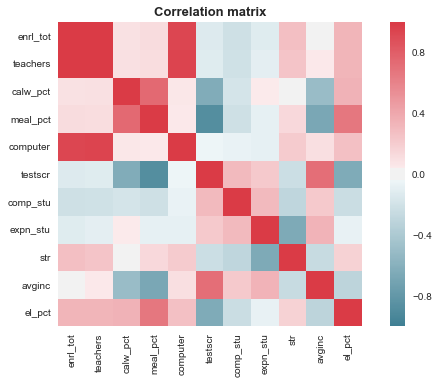

In [2]:
# correlation heat map between all relevant variables
fig, ax = plt.subplots()
variables=['enrl_tot','teachers','calw_pct', 'meal_pct', 'computer', 'testscr', 'comp_stu', 'expn_stu', 'str', 'avginc', 'el_pct']
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train[variables].corr(), vmax=1, vmin=-1, center=0, square=True, ax=ax, cmap=cmap)
ax.set_title('Correlation matrix', fontweight='bold', fontsize=13)
plt.tight_layout()
sns.plt.show()

In [3]:
# numerical correlation table
train[variables].corr().round(2)

,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct
enrl_tot,1.00,1.00,0.09,0.12,0.93,-0.13,-0.22,-0.12,0.28,0.04,0.33
teachers,1.00,1.00,0.10,0.12,0.94,-0.12,-0.21,-0.10,0.25,0.05,0.33
calw_pct,0.09,0.10,1.00,0.74,0.06,-0.64,-0.19,0.05,0.02,-0.50,0.35
meal_pct,0.12,0.12,0.74,1.00,0.05,-0.88,-0.22,-0.08,0.14,-0.67,0.66
computer,0.93,0.94,0.06,0.05,1.00,-0.04,-0.06,-0.08,0.21,0.11,0.27
testscr,-0.13,-0.12,-0.64,-0.88,-0.04,1.00,0.30,0.22,-0.23,0.71,-0.64
comp_stu,-0.22,-0.21,-0.19,-0.22,-0.06,0.30,1.00,0.30,-0.29,0.22,-0.24
expn_stu,-0.12,-0.10,0.05,-0.08,-0.08,0.22,0.30,1.00,-0.65,0.34,-0.08
str,0.28,0.25,0.02,0.14,0.21,-0.23,-0.29,-0.65,1.00,-0.25,0.18
avginc,0.04,0.05,-0.50,-0.67,0.11,0.71,0.22,0.34,-0.25,1.00,-0.31


In [4]:
# A potential predictor may be causing OVB if it could be a determinant of Y and is correlated with X. 
# I've just done the MLR with factors I think are likely, this will definitely change once some actual analysis is done..
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols(formula='testscr ~ str + avginc + el_pct + expn_stu + comp_stu', data=train) 
reg = model.fit()
reg.summary()


C:\Users\sarah\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     162.5
Date:                Sun, 29 Oct 2017   Prob (F-statistic):           9.93e-87
Time:                        11:09:55   Log-Likelihood:                -1256.7
No. Observations:                 336   AIC:                             2525.
Df Residuals:                     330   BIC:                             2548.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    640.2120     12.543     51.041      0.000     615.538     664.886
str           -0.0034      0.392     -0.009      0.993      -0.775       0.768
avginc         1.5005      0.088     17.106      0.000       1.328       1.673
el_pct        -0.4803      0.034    -14.186      0.000      -0.547      -0.414
expn_stu      -0.0008      0.001     -0.701      0.484      -0.003       0.002
comp_stu      21.9546      9.473      2.318      0.021       3.320      40.589
==============================================================================
Omnibus:                        7.234   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                8.412
Skew:                          -0.225   Prob(JB):                       0.0149
Kurtosis:                       3.631   Cond. No.                     1.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
reg.mse_resid**0.5

10.280873639833903

In [6]:
resid=reg.resid
fit=reg.fittedvalues

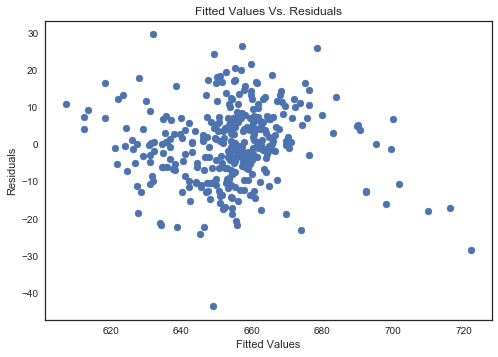

In [7]:
plt.scatter(fit,resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values Vs. Residuals')
plt.show()

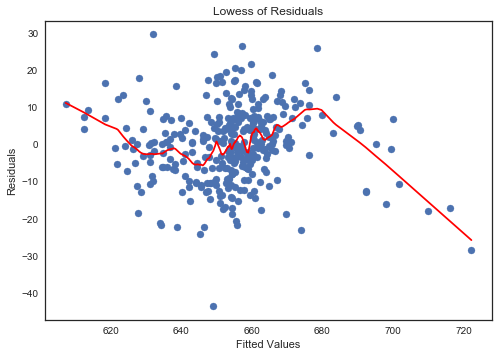

In [14]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
plt.scatter(fit,resid)
z1 = lowess(resid, fit, frac=1./10)
plt.plot(z1[:,0],z1[:,1],'red')
plt.title('Lowess of Residuals')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [15]:
features = train[['str','avginc','el_pct', 'expn_stu','comp_stu']]
features = sm.add_constant(features)  # make sure to include a column of 1s when using the variance inflation factor function.
features.head()

,const,str,avginc,el_pct,expn_stu,comp_stu
0,1.0,20.388889,16.955999,6.539509,4920.777344,0.159401
1,1.0,18.027779,9.630000,80.123260,5621.456055,0.047766
2,1.0,21.564363,11.592000,38.158752,5034.290039,0.081002
3,1.0,22.302158,15.365000,0.000000,4302.834961,0.205645
4,1.0,18.686869,12.174000,0.540541,4385.229492,0.151351


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(5): # range is number of selected variables + 1
    vif.append(variance_inflation_factor(features.values, i+1))
    
print(vif)

[1.8040337959875394, 1.2488789139794667, 1.1740389304586172, 1.9073411600268828, 1.1782484093988888]


In [17]:
np.mean(vif)

1.4625082419702791